### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [81]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [8]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
print (data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [82]:
#Drop column 'car' as the values has no corralation or dependency with other columns in the dataset
data['car'].unique()
data = data.drop('car', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [83]:
#Replace missing values and replace string numberic values into proper numeric values for columns, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50

data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']] = data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].fillna('')
data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']] = data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].replace(['never', 'less1', ''], '0')
data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']] = data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].replace(['1~3'], '2')
data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']] = data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].replace(['4~8'], '6')
data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']] = data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].replace(['gt8'], '10')

data['Bar'] = pd.to_numeric(pd.Series(data['Bar']), errors ='ignore')  
data['CoffeeHouse'] = pd.to_numeric(pd.Series(data['CoffeeHouse']), errors ='ignore')  
data['CarryAway'] = pd.to_numeric(pd.Series(data['CarryAway']), errors ='ignore')  
data['RestaurantLessThan20'] = pd.to_numeric(pd.Series(data['RestaurantLessThan20']), errors ='ignore')  
data['Restaurant20To50'] = pd.to_numeric(pd.Series(data['Restaurant20To50']), errors ='ignore')



In [84]:
print (data.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  int64 
 15  CoffeeHouse           12684 non-null

In [14]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,0,6,2,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,6,2,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,0,0,6,2,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,6,2,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0,0,6,2,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [161]:
# Findings of coupon accepted by drivers
# Used Plotly package for visualization
fig = px.histogram(data.query('Y == 1'), x='coupon', color='has_children', pattern_shape='has_children', text_auto=True)
fig.update_layout(
    title='Findings of coupons accepted by drivers',
    xaxis_nticks=20,
    title_x=0.5)
fig.show()

 

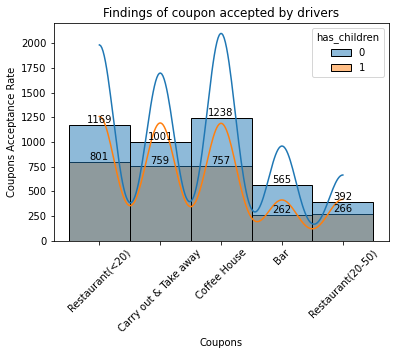

In [108]:
# Findings of coupon accepted by drivers using seaborn for visualization

data_0 = data[(data['Y'] == 1)]
ax0 = sns.histplot(data = data_0, x='coupon', hue = 'has_children', kde = True)
ax0.set(xlabel='Coupons', ylabel='Coupons Acceptance Rate')
plt.xticks(rotation=45)
plt.title("Findings of coupon accepted by drivers")

for i in ax0.containers:
    ax0.bar_label(i,)
    
plt.show(ax0)

5. Use a bar plot to visualize the `coupon` column.

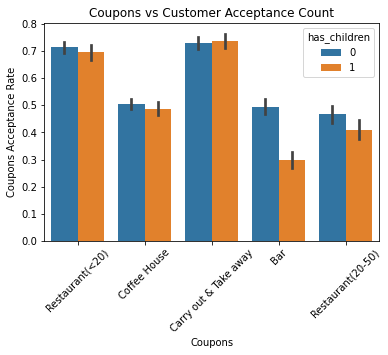

In [109]:
# Findings on coupon column using barplot using seaborn for visualization
ax1 = sns.barplot(data=data, x='coupon', y='Y', hue='has_children' )
ax1.set(xlabel='Coupons', ylabel='Coupons Acceptance Rate')
plt.xticks(rotation=45)
plt.title("Coupons vs Customer Acceptance Count")
plt.show(ax1)



Findings on coupon column using seaborn visualization:
Drivers irrespective of children with them prefer Restaurant(<20), Coffee House and Carry out & Take away coupons equally.
More drivers without children prefer Bar coupons than drivers with children


6. Use a histogram to visualize the temperature column.

In [160]:
# Findings on temperature column using Plotly visualization
fig3 = px.histogram(data.query('Y == 1'), x='temperature', color='has_children', pattern_shape='Y', nbins=8, text_auto=True)
fig3.update_layout(
    title='Findings of coupons accepted by drivers based on temperature',
    xaxis_nticks=20,
    title_x=0.5)
fig3.show()


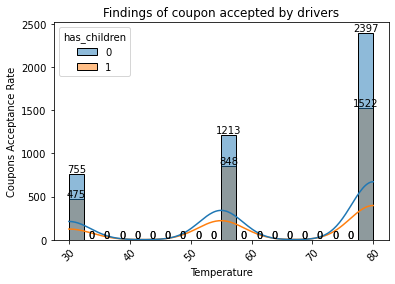

In [110]:
# Findings on temperature column using seaborn visualization

data_1 = data[(data['Y'] == 1)]
ax2 = sns.histplot(data = data_1, x='temperature', hue = 'has_children', kde = True)
ax2.set(xlabel='Temperature', ylabel='Coupons Acceptance Rate')
plt.xticks(rotation=45)
plt.title("Findings of coupon accepted by drivers")

for i in ax2.containers:
    ax2.bar_label(i,)
    
plt.show(ax2)


Findings on temperature column using Plotly visualization:
Drivers accept coupons as temperature increases
More drivers without children accept coupons than drivers with children as temperature increases

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [117]:
data2 = data.query('coupon == "Bar" and Bar > 0')
data2

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,0,2,0,2,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,0,2,0,2,1,0,0,1,0,1
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,0,2,0,2,1,1,1,0,1,0
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,10,6,2,0,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,10,6,2,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,0,6,6,0,1,1,1,0,1,0
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,0,10,6,2,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,0,10,6,2,1,1,0,0,1,1
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,0,10,6,2,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [162]:
#Findings on proportion of bar coupons accepted and using Plotly for visualization
fig4 = px.histogram(data2.query('Y == 1 and coupon == "Bar"').sort_values(by = "Bar"), x='coupon', color='Bar', pattern_shape='Y', text_auto=True)
fig4.update_layout(
    title='Proportion of bar coupons accepted by drivers',
    xaxis_nticks=20,
    title_x=0.5)
fig4.show()




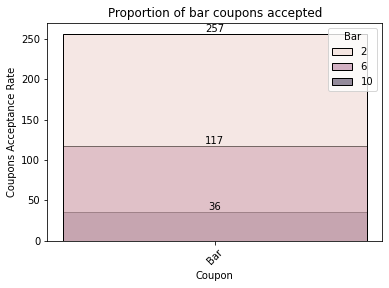

In [154]:
#Findings on proportion of bar coupons accepted and using seaborn for visualization

data_2 = data2.query('Y == 1 and coupon == "Bar"')
ax3 = sns.histplot(data = data_2, x='coupon', hue = 'Bar')
ax3.set(xlabel='Coupon', ylabel='Coupons Acceptance Rate')
plt.xticks(rotation=45)
plt.title("Proportion of bar coupons accepted")

for i in ax3.containers:
    ax3.bar_label(i,)
    
plt.show(ax3)

Findings on proportion of bar coupons accepted:
More drivers who has average bar visits of 2 times a month accept coupons than average bar visits 6 and 10 times.  
As number of average bar visits increases, driver's coupon acceptance rate decreases.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [177]:
# Findings on comparison of acceptance rate between those who went to a bar 3 or fewer times a month to those who went more and used Plotly visualization
fig5 = px.histogram(data2.query('coupon == "Bar" and Bar <= 3 and Y == 1'), x='coupon', color='Bar', pattern_shape='has_children', text_auto=True)
fig5.update_layout(
    title='Driver visits to bar <= 3',
    xaxis_nticks=20,
    title_x=0.5)
fig5.show()

fig6 = px.histogram(data2.query('coupon == "Bar" and Bar > 3 and Y == 1'), x='coupon', color='Bar', pattern_shape='has_children', text_auto=True)
fig6.update_layout(
    title='Driver visits to bar > 3',
    xaxis_nticks=20,
    title_x=0.5)
fig6.show()

#data_coupon_groupby = data2.groupby(["coupon", "Bar", "Y"], as_index=True)["Y"].count()
#print(data_coupon_groupby)


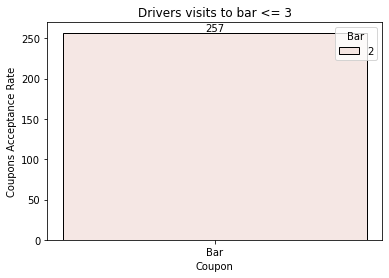

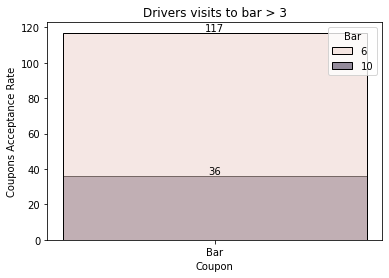

In [157]:
# Findings on comparison of acceptance rate between those who went to a bar 3 or fewer times a month to those who went more and used seaborn visualization

data_3 = data2.query('coupon == "Bar" and Bar <= 3 and Y == 1 ')
ax4 = sns.histplot(data = data_3, x='coupon', hue = 'Bar')
ax4.set(xlabel='Coupon', ylabel='Coupons Acceptance Rate')
plt.title("Drivers visits to bar <= 3")

for i in ax4.containers:
    ax4.bar_label(i,)   
plt.show(ax4)

data_4 = data2.query('coupon == "Bar" and Bar > 3 and Y == 1 ')
ax5 = sns.histplot(data = data_4, x='coupon', hue = 'Bar')
ax5.set(xlabel='Coupon', ylabel='Coupons Acceptance Rate')
plt.title("Drivers visits to bar > 3")

for i in ax5.containers:
    ax5.bar_label(i,)
plt.show(ax5)



#Findings on comparison of acceptance rate between those who went to a bar 3 or fewer times a month to those who went more:

Drivers <=3 visits to bar has high bar coupons acceptance rate than drivers who go to bar more than 3 times.  Drivers with no children in this scenario has more acceptance rate.



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [166]:
# Findings of acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others
fig7 = px.histogram(data2.query('coupon == "Bar" and Bar > 1 and (age > "25" and age != "below21") and Y == 1').sort_values(by='age'), x='age', color='coupon', pattern_shape='Y', text_auto=True)
fig7.update_layout(
    title='Coupons acceptance rate of drivers who go to bar more than once and age > 25',
    xaxis_nticks=20,
    title_x=0.5)
fig7.show()

fig8 = px.histogram(data2.query('coupon == "Bar" and Bar > 1 and (age <= "25" or age == "below21") and Y == 1').sort_values(by='age'), x='age', color='coupon', pattern_shape='Y', text_auto=True)
fig8.update_layout(
    title='Coupons acceptance rate of drivers who go to bar more than once and age <= 25',
    xaxis_nticks=20,
    title_x=0.5)
fig8.show()


#data2_query_4 = data2.query('coupon == "Bar" and Bar > 1 and age <= "25" and Y == 1').sort_values(by='age')
#data2_query_4


#Findings of Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a Difference?:

Drivers acceptance rate of coupons who go to bar more than once a month is more for age groups above 25 than age groups below 25.
Drivers acceptance rate is high particularly between 21 and 26 in this scenario and the rate decreases as the age increases.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [176]:
# Findings on comparison of acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry:
occupations = ['Farming', 'Fishing', 'Forestry']
fig9 = px.histogram(data2.query('coupon == "Bar" and Bar > 1 and passanger != "Kid(s)" and occupation not in @occupations and Y == 1').sort_values(by='occupation'), x='occupation', color='passanger', text_auto=True)
fig9.update_layout(
    title='Drivers acceptance rate of bar coupons go to bar > 1 for passenger type and occupation',
    xaxis_nticks=20,
    title_x=0.5)
fig9.show()



#Findings on comparison of acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry:

Drivers who go to bar more than once and not a kid with occupation 'Unemployment' and the passenger type is 'Alone' and then 'Friends' has more bar coupon acceptance rate. The next bar coupon acceptance rate follows with occupations Student and Sales & Related in this scenario. 




6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [172]:
#Findings on comparisons: 
#a) drivers go to bar > 1, passanger not a kid, not a widowed 
#b) drivers go to bar > 1 and age < 30 
#c) drivers to go cheap restaurants > 4 and income < 50K

passenger = ['Kid(s)']
maritalStatus = ['widowed']
data2_query_1 = data2.query('coupon == "Bar" and Bar > 1 and passanger not in @passenger and maritalStatus not in @maritalStatus and Y == 1')
data2_query_2 = data2.query('coupon == "Bar" and Bar > 1 and age < "30" and Y == 1')
data2_query_3 = data2.query('RestaurantLessThan20 > 4 and income == "$37500 - $49999" and Y == 1')
data2_query_4 = [data2_query_1, data2_query_2, data2_query_3]
data2_result = pd.concat(data2_query_4)

fig10 = px.histogram(data2_result, x='passanger', color='maritalStatus', pattern_shape='Y',  text_auto=True)
fig10.update_layout(
    title='Coupons acceptance rate of drivers with 3 different scenarios',
    xaxis_nticks=20,
    title_x=0.5)
fig10.show()



#Findings on comparisons: 
#a) drivers go to bar > 1, passanger not a kid, not a widowed 
#b) drivers go to bar > 1 and age < 30 
#c) drivers to go cheap restaurants > 4 and income < 50K

In this scenario, passanger type 'Alone' and marital status 'Single', 'Unnammed/Married Partner' have high bar coupon acceptance rate when compared to other passanger types



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Summary Findings of bar coupns acceptance rate:

There is a high bar coupons acceptance rate of drivers with the following parameters:
    1) Passangers Type: Alone
    2) Marrital Status: Single or Friends
    3) Occupation: Unemployed, Student and Sales & Related
    4) Age: 21 and 26
    5) Number of bar visits: 2
    6) Has children: 0

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create a new DataFrame that contains just the Coffee House coupons.

2. What proportion of Coffee House coupons were accepted?

In [25]:
data3 = data.query('coupon == "Coffee House" and CoffeeHouse > 0')
data3

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
45,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,46,Single,...,6,2,2,0,1,0,0,0,1,1
48,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,6,2,2,0,1,0,0,0,1,1
49,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,46,Single,...,6,2,2,0,1,1,0,0,1,1
50,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,46,Single,...,6,2,2,0,1,1,0,0,1,0
52,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,46,Single,...,6,2,2,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12360,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,31,Single,...,6,0,6,2,1,1,0,0,1,0
12366,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,31,Single,...,6,0,6,2,1,0,0,1,0,1
12624,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,21,Unmarried partner,...,6,2,2,0,1,0,0,1,0,1
12625,Home,Alone,Snowy,30,10PM,Coffee House,2h,Female,21,Unmarried partner,...,6,2,2,0,1,1,0,0,1,0


In [26]:
#Dataset correlation related to Coffee House records
fig_corr = px.imshow(data3.corr(), text_auto=True, aspect="auto")
fig_corr.show()

2. What proportion of coffee house coupons were accepted?

In [27]:
fig11 = px.histogram(data3.query('Y == 1 and coupon == "Coffee House"').sort_values(by = "CoffeeHouse"), x='coupon', color='CoffeeHouse', pattern_shape='Y', text_auto=True)
fig11.show()


3. Compare the acceptance rate between those who went to a cofee house 3 or fewer times a month to those who went more.

In [28]:
fig12 = px.histogram(data3.query('coupon == "Coffee House" and CoffeeHouse <= 3'), x='coupon', color='CoffeeHouse', pattern_shape='Y', text_auto=True)
fig12.show()

fig13 = px.histogram(data3.query('coupon == "Coffee House" and CoffeeHouse > 3'), x='coupon', color='CoffeeHouse', pattern_shape='Y', text_auto=True)
fig13.show()

#data_coupon_groupby = data3.groupby(["coupon", "CoffeeHouse", "Y"], as_index=True)["Y"].count()
#print(data_coupon_groupby)



coupon        CoffeeHouse  Y
Coffee House  2            0    367
                           1    675
              6            0    169
                           1    369
              10           0    117
                           1    225
Name: Y, dtype: int64


4. Compare the acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 to the all others. Is there a difference?

In [29]:
fig14 = px.histogram(data3.query('coupon == "Coffee House" and CoffeeHouse > 1 and (age > "25" and age != "below21") and Y == 1').sort_values(by='age'), x='age', color='coupon', pattern_shape='Y', text_auto=True)
fig14.show()

fig15 = px.histogram(data3.query('coupon == "Coffee House" and CoffeeHouse > 1 and (age <= "25" or age == "below21") and Y == 1').sort_values(by='age'), x='age', color='coupon', pattern_shape='Y', text_auto=True)
fig15.show()

# Is there a Difference?
# The age groups above age > 25 are more than age groups below age < 25 for Bar coupon who go to a bar more than once a month.



5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [30]:
occupations = ['Farming', 'Fishing', 'Forestry']
fig16 = px.histogram(data3.query('coupon == "Coffee House" and CoffeeHouse > 1 and passanger != "Kid(s)" and occupation not in @occupations and Y == 1').sort_values(by='occupation'), x='occupation', color='passanger', text_auto=True)
fig16.show()


6. Compare the acceptance rates between those drivers who:

go to cofee house more than once a month, had passengers that were not a kid, and were not widowed OR
go to cofee house more than once a month and are under the age of 30 OR
go to cheap restaurants more than 4 times a month and income is less than 50K.

In [31]:
passenger = ['Kid(s)']
maritalStatus = ['widowed']
data3_query_1 = data3.query('coupon == "Coffee House" and CoffeeHouse > 1 and passanger not in @passenger and maritalStatus not in @maritalStatus and Y == 1')
data3_query_2 = data3.query('coupon == "Coffee House" and CoffeeHouse > 1 and age < "30" and Y == 1')
data3_query_3 = data3.query('RestaurantLessThan20 > 4 and income == "$37500 - $49999" and Y == 1')
data3_query_4 = [data3_query_1, data3_query_2, data3_query_3]
data3_result = pd.concat(data3_query_4)

fig17 = px.histogram(data3_result, x='passanger', color='maritalStatus', pattern_shape='Y',  text_auto=True)
fig17.show()


7. Based on these observations, what do you hypothesize about drivers who accepted the cofee house coupons?